In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:

df = pd.read_csv("/content/heart_2020.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:

print("Shape of dataset:", df.shape)

df.info()

print(df.dtypes)

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
319790,False
319791,False
319792,False
319793,False


In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
num_col = 'SleepTime'
sleep_median = df[num_col].median()
df[num_col] = df[num_col].fillna(sleep_median)
print(f"Filled missing {num_col} with median: {sleep_median}")

Filled missing SleepTime with median: 7.0


In [ ]:
cat_cols = ['Asthma', 'KidneyDisease', 'SkinCancer']
for col in cat_cols:
    col_mode = df[col].mode()[0]
    df[col] = df[col].fillna(col_mode)
    print(f"Filled missing {col} with mode: {col_mode}")

Filled missing Asthma with mode: No
Filled missing KidneyDisease with mode: No
Filled missing SkinCancer with mode: No


In [ ]:
df['PhysicalActivity'] = df['PhysicalActivity'].fillna(df['PhysicalActivity'].mode()[0])
df['Race']= df['Race'].fillna(df['Race'].mode()[0])
df['Diabetic']= df['Diabetic'].fillna(df['Diabetic'].mode()[0])
df['GenHealth']= df['GenHealth'].fillna(df['GenHealth'].mode()[0])

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
df.duplicated().sum()

np.int64(18078)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# ENCODING


In [ ]:
yes_no_dict = {
    'Yes': 1,
    'No': 0
}

for colname in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df[colname] = df[colname].replace(yes_no_dict)


/tmp/ipython-input-3818253317.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colname] = df[colname].replace(yes_no_dict)


In [ ]:
f_m_dict = {
    'Male': 1,
    'Female': 0
}

for colname in ['Sex']:
    df[colname] = df[colname].replace(f_m_dict).astype(int)


/tmp/ipython-input-2920022581.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colname] = df[colname].replace(f_m_dict).astype(int)


In [ ]:
age_dict = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

for colname in ['AgeCategory']:
    df[colname] = df[colname].replace(age_dict)


/tmp/ipython-input-1301521090.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colname] = df[colname].replace(age_dict)


In [ ]:
gen_dict = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

for colname in ['GenHealth']:
    df[colname] = df[colname].replace(gen_dict)


/tmp/ipython-input-334235830.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colname] = df[colname].replace(gen_dict)


In [ ]:
onehot_columns = ['Race', 'Diabetic']
df= pd.get_dummies(df, columns = onehot_columns)

In [ ]:
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,8,...,False,False,False,False,False,True,False,False,True,False
1,0,20.34,0,0,1,0.0,0.0,0,0,13,...,False,False,False,False,False,True,True,False,False,False
2,0,26.58,1,0,0,20.0,30.0,0,1,10,...,False,False,False,False,False,True,False,False,True,False
3,0,24.21,0,0,0,0.0,0.0,0,0,12,...,False,False,False,False,False,True,True,False,False,False
4,0,23.71,0,0,0,28.0,0.0,1,0,5,...,False,False,False,False,False,True,True,False,False,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


# **Outliers**

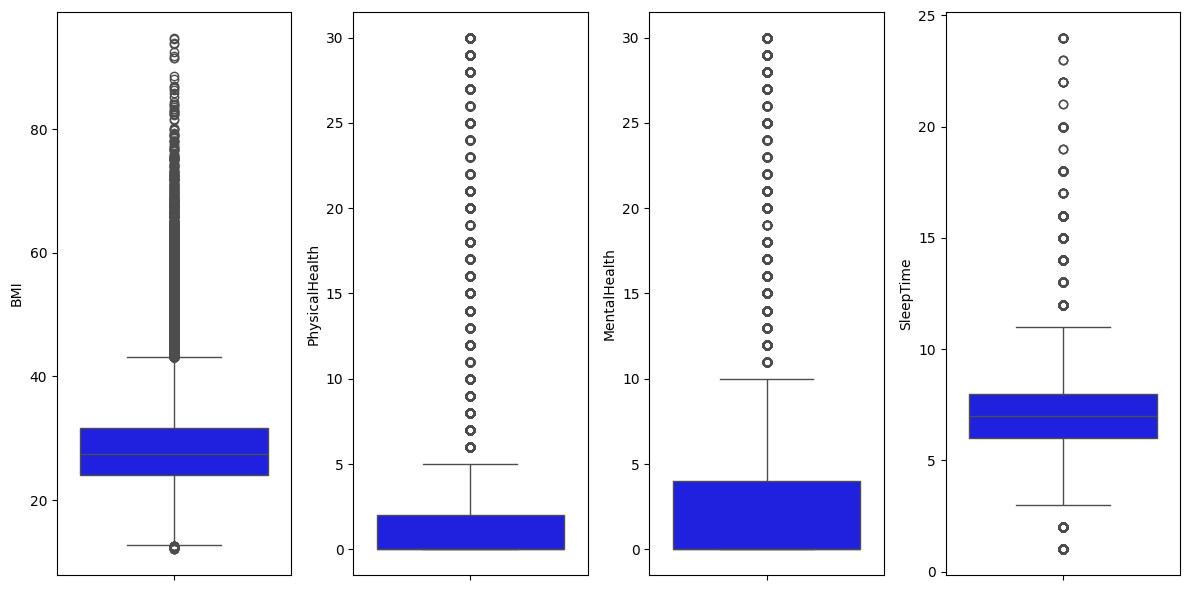

In [ ]:
plt.figure(figsize=(12,6))
numericals = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='blue')
    plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('heart_data_cleaned.csv', index=False)

# **Distribution**


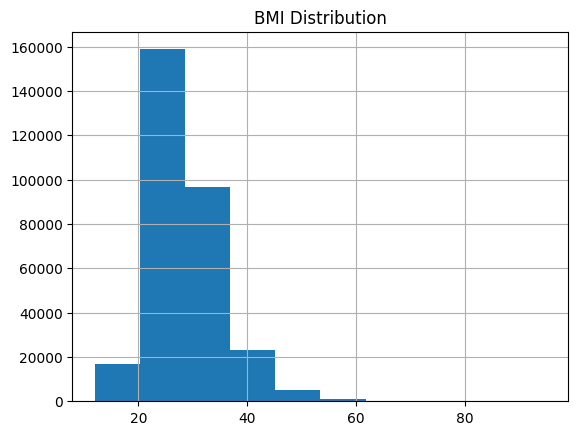

In [ ]:
df['BMI'].hist()
plt.title("BMI Distribution")
plt.show()

# **Correlation**

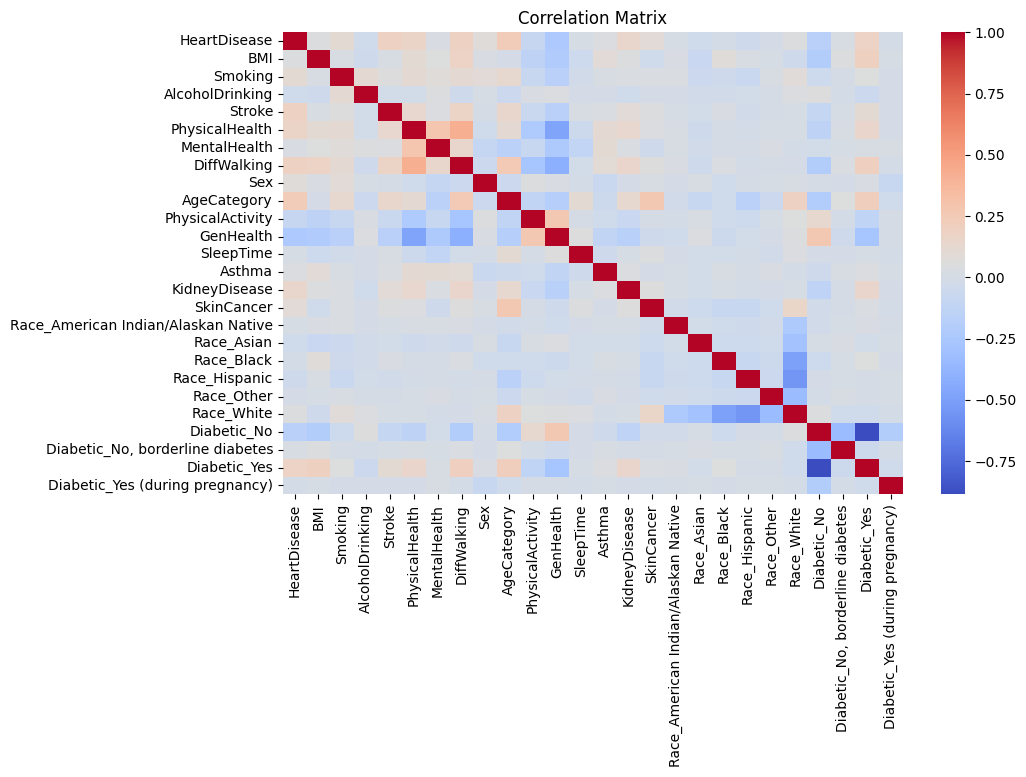

In [ ]:
plt.figure(figsize=(10,6))

# Fix: Convert boolean columns to integer (1 and 0) if any exist
# This ensures all columns are numeric for correlation calculation
boolean_cols = df.select_dtypes(include='bool').columns
if not boolean_cols.empty:
    for col in boolean_cols:
        df[col] = df[col].astype(int)

sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **StandardScaler**

In [ ]:

scaler = StandardScaler()
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
df[num_cols] = scaler.fit_transform(df[num_cols])


# **Train and Test data**

In [ ]:

x = df.drop('HeartDisease', axis=1)
y = df[['HeartDisease']]
from sklearn.model_selection import train_test_split
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size = 0.20, random_state = 46)

# **Target و Features للـ Regression**

In [ ]:
# Target (رقمي)
y_reg = df['BMI']

# Features (نستبعد الـ Target والـ Classification Target)
X_reg = df.drop(['BMI', 'HeartDisease'], axis=1)


In [ ]:
# تعويض القيم الناقصة بمتوسط كل عمود
X_reg = X_reg.fillna(X_reg.mean())


# **Train / Test Split Regression**

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


# تدريب Linear **Regression**

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)


LinearRegression()

# **Predictions**

In [ ]:
y_pred_reg = lin_reg_model.predict(X_test_reg)


# **Regression Metrics**

In [ ]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Regression Metrics:
MSE: 0.891205761918424
RMSE: 0.944036949445531
R² Score: 0.10667930509316825


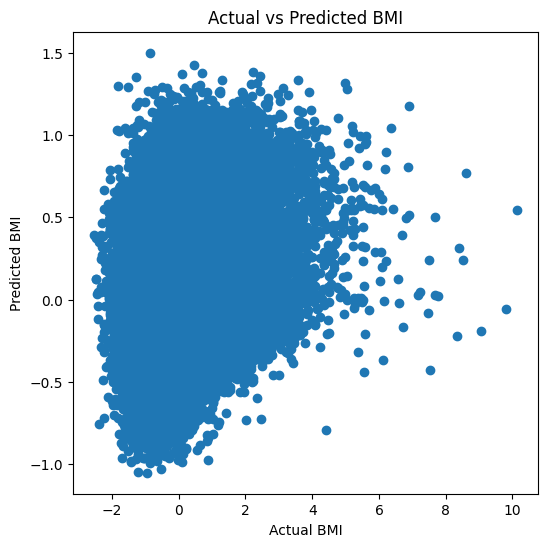

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv("heart_2020_cleaned.csv")

y = df["HeartDisease"]

print("Samples:", x.shape[0])
print("Features:", x.shape[1])
y = y.map({'No': 0, 'Yes': 1})
print("Target classes:", y.unique())

Samples: 301717
Features: 25
Target classes: [0 1]


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("heart_2020_cleaned.csv")

# Features and Target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

print(df.head())

# Convert categorical features to numerical
X = pd.get_dummies(X, drop_first=True)

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [ ]:
 # Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
 # Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create and train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
print(model.predict_proba(X_test[:5]))

[[0.99540401 0.00459599]
 [0.99679749 0.00320251]
 [0.98444963 0.01555037]
 [0.93295839 0.06704161]
 [0.77948135 0.22051865]]


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9138
Confusion Matrix:
[[57889   478]
 [ 5033   559]]
Precision: 0.5390549662487946
Recall: 0.09996423462088698


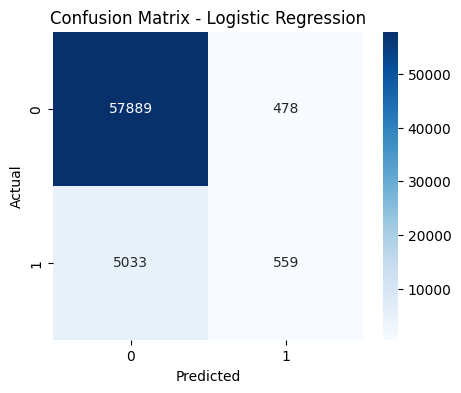

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
FN = cm[1, 0]
print("False Negatives:", FN)


False Negatives: 5033


***Precision vs Recall Trade-off:***

---


Precision measures how many predicted positive cases are actually positive.

Recall measures how many actual positive cases are correctly identified.

In this dataset (Heart Disease prediction), False Negatives are critical, because:

A False Negative means a patient who actually has heart disease is predicted as healthy.

This can lead to missing medical treatment or early intervention.

Therefore, minimizing False Negatives is crucial, making Recall more important than Precision in this healthcare classification task.

Although higher Recall may increase False Positives, in medical applications this is often acceptable, as further medical tests can be used to confirm the diagnosis.


K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("PERSON 5 TASK: CLUSTERING MODEL AND FINAL REPORT")

PERSON 5 TASK: CLUSTERING MODEL AND FINAL REPORT


In [ ]:
df = pd.read_csv("/content/heart_2020_cleaned.csv")

yes_no_dict = {'Yes': 1, 'No': 0}
for colname in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df[colname] = df[colname].replace(yes_no_dict)

f_m_dict = {'Male': 1, 'Female': 0}
df['Sex'] = df['Sex'].replace(f_m_dict).astype(int)

age_dict = {'18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5,
            '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
            '70-74': 11, '75-79': 12, '80 or older': 13}
df['AgeCategory'] = df['AgeCategory'].replace(age_dict)

gen_dict = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
df['GenHealth'] = df['GenHealth'].replace(gen_dict)

onehot_columns = ['Race', 'Diabetic']
df = pd.get_dummies(df, columns=onehot_columns)

num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df = df.dropna()

print(f"Data shape after preprocessing: {df.shape}")

Data shape after preprocessing: (319795, 26)


In [ ]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

y = y.astype(int)
print(f"Unique values in y: {y.unique()}")
print(f"NaN in y: {y.isna().sum()}")

X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Unique values in y: [0 1]
NaN in y: 0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Classification Results:
Accuracy: 0.9137
Precision: 0.5339
Recall: 0.1041


In [ ]:
y_reg = df['BMI']
X_reg = df.drop(['BMI', 'HeartDisease'], axis=1)
X_reg = pd.get_dummies(X_reg, drop_first=True)
X_reg = X_reg.fillna(X_reg.mean())

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg_model.predict(X_test_reg)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nRegression Results:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Regression Results:
R² Score: 0.1097
MSE: 0.8821
RMSE: 0.9392


In [ ]:
print("\n" + "="*60)
print("CLUSTERING ANALYSIS")
print("="*60)

df_cluster = df.copy()
clustering_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
                       'AgeCategory', 'GenHealth', 'PhysicalActivity']
X_cluster = df_cluster[clustering_features]

scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X_cluster)

print(f"Clustering data shape: {X_scaled.shape}")
print(f"Features used for clustering: {clustering_features}")


CLUSTERING ANALYSIS
Clustering data shape: (319795, 7)
Features used for clustering: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory', 'GenHealth', 'PhysicalActivity']


In [ ]:
inertia_values = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    if k > 1:
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_silhouette_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
optimal_k = 3
print(f"\nSelected optimal K = {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df_cluster['Cluster'] = cluster_labels

print("\nCluster Distribution:")
print(df_cluster['Cluster'].value_counts().sort_index())

cluster_means = df_cluster.groupby('Cluster')[clustering_features].mean()
print("\nCluster Characteristics (mean values):")
print(cluster_means)


Selected optimal K = 3

Cluster Distribution:
Cluster
0    231460
1     32176
2     56159
Name: count, dtype: int64

Cluster Characteristics (mean values):
              BMI  PhysicalHealth  MentalHealth  SleepTime  AgeCategory  \
Cluster                                                                   
0       -0.105513       -0.314562     -0.126029   0.020468     7.212352   
1        0.366223        2.690139      1.038321  -0.242560     8.602499   
2        0.225047       -0.244831     -0.075471   0.054615     8.136648   

         GenHealth  PhysicalActivity  
Cluster                               
0         3.860006          1.000000  
1         2.082826          0.512401  
2         3.369326          0.000178  


In [ ]:
for cluster_num in range(optimal_k):
    cluster_data = cluster_means.loc[cluster_num]
    print(f"\nCluster {cluster_num}:")
    print(f"  Size: {df_cluster['Cluster'].value_counts()[cluster_num]}")
    print(f"  Avg BMI: {cluster_data['BMI']:.2f}")
    print(f"  Avg Physical Health: {cluster_data['PhysicalHealth']:.2f}")
    print(f"  Avg Mental Health: {cluster_data['MentalHealth']:.2f}")
    print(f"  Avg Sleep Time: {cluster_data['SleepTime']:.2f}")


Cluster 0:
  Size: 231460
  Avg BMI: -0.11
  Avg Physical Health: -0.31
  Avg Mental Health: -0.13
  Avg Sleep Time: 0.02

Cluster 1:
  Size: 32176
  Avg BMI: 0.37
  Avg Physical Health: 2.69
  Avg Mental Health: 1.04
  Avg Sleep Time: -0.24

Cluster 2:
  Size: 56159
  Avg BMI: 0.23
  Avg Physical Health: -0.24
  Avg Mental Health: -0.08
  Avg Sleep Time: 0.05


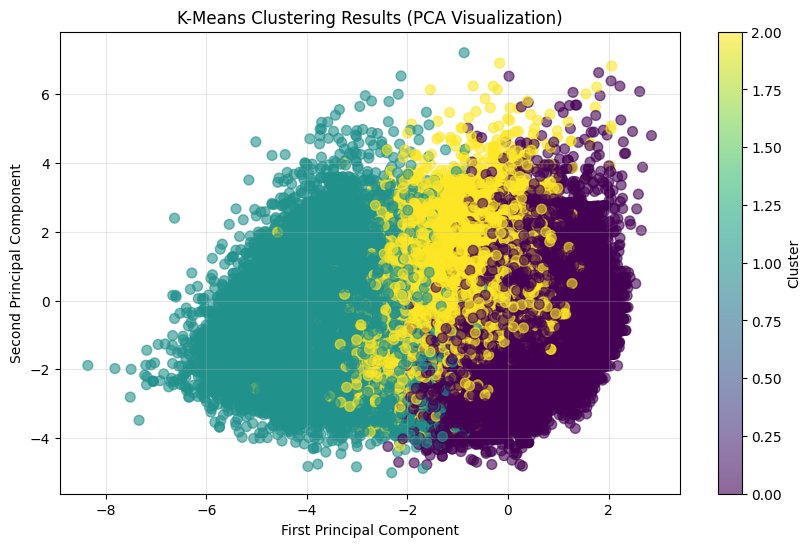

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
                     c=pca_df['Cluster'], cmap='viridis',
                     alpha=0.6, s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results (PCA Visualization)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x800 with 0 Axes>

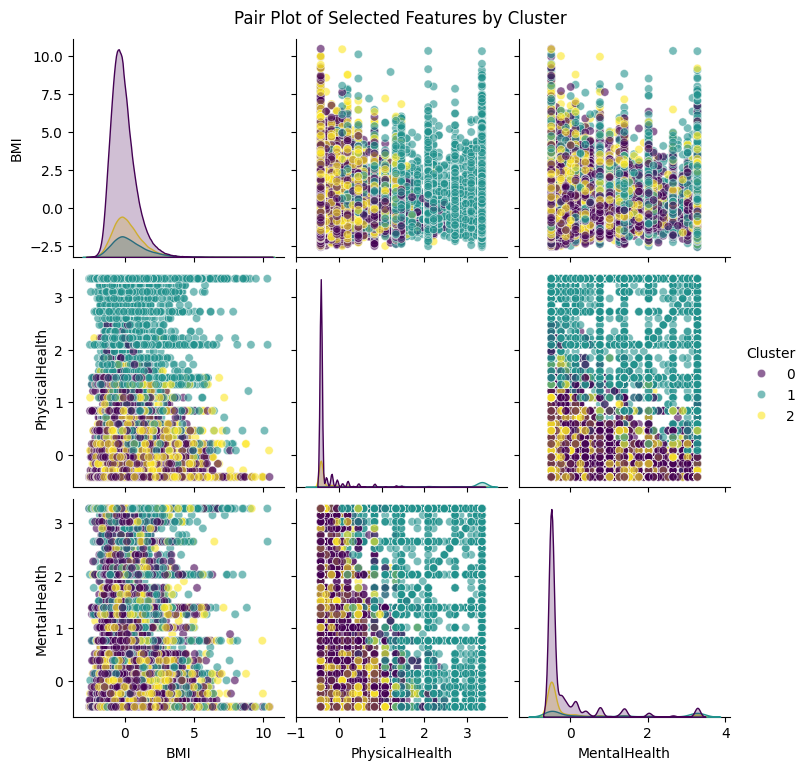

In [ ]:
pair_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'Cluster']
pair_df = df_cluster[pair_features].copy()
plt.figure(figsize=(10, 8))
sns.pairplot(pair_df, hue='Cluster', palette='viridis',
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.savefig('pair_plot_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

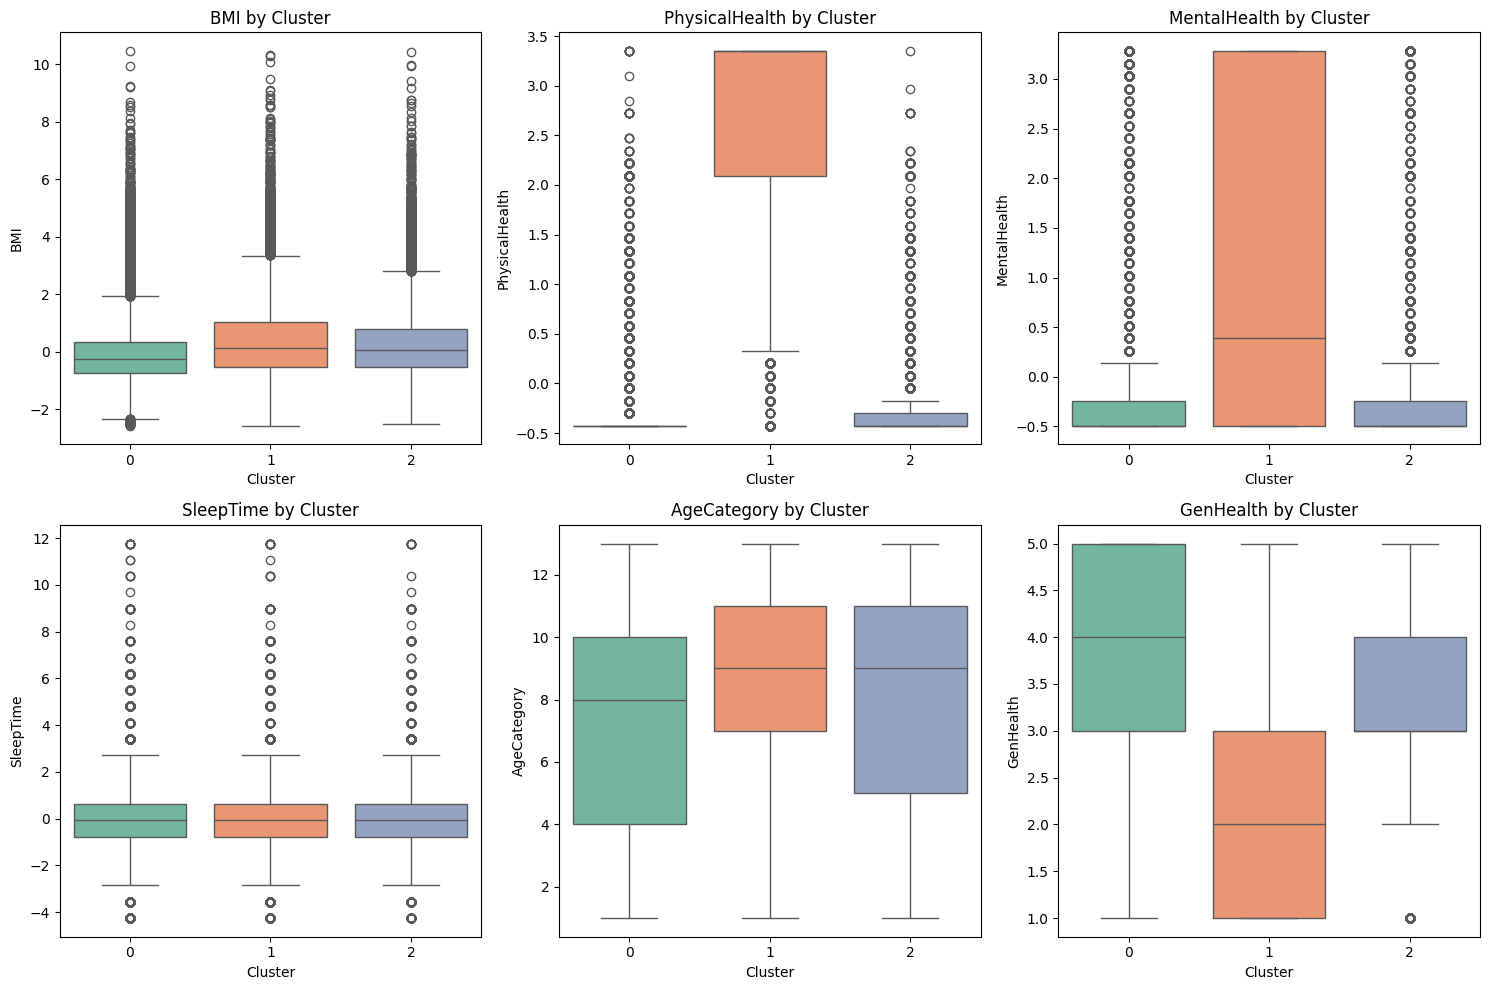

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(clustering_features[:6]):
    sns.boxplot(x='Cluster', y=feature, data=df_cluster, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)
plt.tight_layout()
plt.savefig('boxplot_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_cluster.to_csv('clustering_results.csv', index=False)

with open('cluster_summary.txt', 'w') as f:
    f.write("CLUSTERING ANALYSIS SUMMARY\n")
    f.write(f"Dataset: Heart Disease Dataset\n")
    f.write(f"Optimal K: {optimal_k}\n")
    f.write(f"Features used: {clustering_features}\n\n")
    f.write("Cluster Distribution:\n")
    f.write(df_cluster['Cluster'].value_counts().sort_index().to_string())
    f.write("\n\n")
    f.write("Cluster Means:\n")
    f.write(cluster_means.to_string())

print("Clustering results saved to 'clustering_results.csv' and 'cluster_summary.txt'")

Clustering results saved to 'clustering_results.csv' and 'cluster_summary.txt'


K-Means by Menna Akram

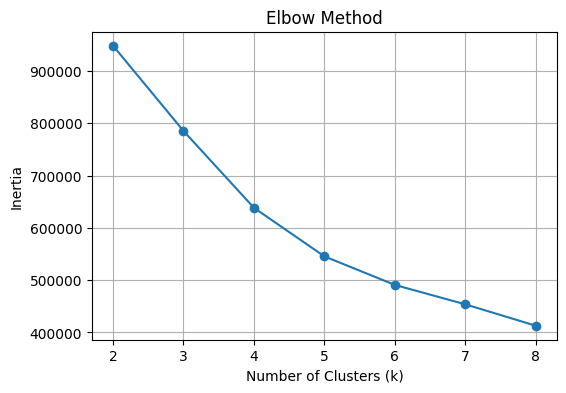

Silhouette Score for k=3: 0.465


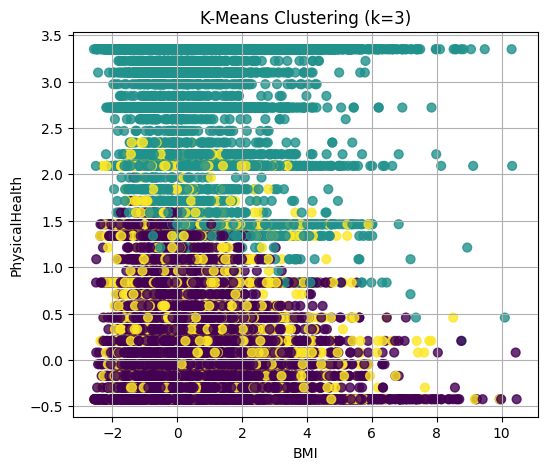

In [ ]:
features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
X = df[features]

#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow Method
Ks = range(2, 9)
inertias = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

#Elbow plot
plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()


optimal_k = 3

# Fit KMeans
km_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_final = km_final.fit_predict(X_scaled)

# Silhouette Score
sil_score = silhouette_score(X_scaled, labels_final)
print(f"Silhouette Score for k={optimal_k}: {sil_score:.3f}")

# Visualization
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_final, s=40, cmap='viridis', alpha=0.8)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.grid(True)
plt.show()